<a href="https://colab.research.google.com/github/nikhilmishra1710/PySpaceShooters/blob/main/Draft1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CANDLESTICK BASED TRADING STARTEGY BACKTESTING**

Candlestick-based trading strategy backtesting refers to the process of evaluating a trading strategy using historical price data to see how it would have performed in the past. In the context of candlestick patterns, it involves analyzing historical candlestick patterns and their associated trading signals to assess the effectiveness and profitability of the strategy.

Here's a breakdown of the terms:

**Candlestick-Based Trading Strategy**: Candlestick patterns are graphical representations of price movements in a certain time period. Traders use these patterns to make trading decisions. For example, a bullish engulfing pattern occurs when a small bearish candle is followed by a larger bullish candle, suggesting a potential bullish reversal. Traders can develop strategies based on these patterns.

**Backtesting**: Backtesting is the process of applying a trading strategy to historical price data to see how it would have performed in the past. It involves running the strategy using historical data to generate hypothetical buy and sell signals. By doing this, traders can assess the strategy's effectiveness, profitability, and risk levels over historical periods.

##Before we dive into Candlestick-based trading strategy let us explore what does the candle represent



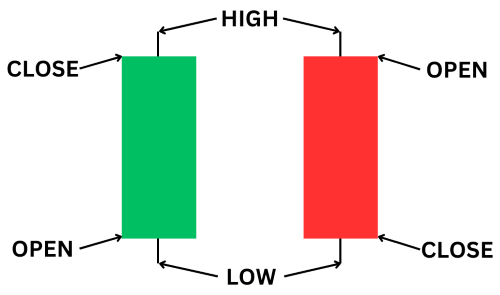


We would be learning about three single candlestick patterns:
1. Hammer or Inverted Hammer and Hanging Man or Shooting Star
2. Dragonfly Doji and Gravestone Doji
3. Marubuzo


Before we dive into any candlestick pattern backset let us first get our dataset and required libraries ready
For this we will be using:
1. yfinance
2. vectorbt
3. talib
4. pandas
5. mplfinance

#Instialling all the libraries

In [ ]:
!pip install yfinance vectorbt pandas mplfinance

In [ ]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib

#This process takes about 2-3 min

#Let us first get the stock data of google in the time interval 01-01-2022 to 01-10-2023

In [ ]:
import yfinance as yf

ticker=yf.Ticker("GOOG")

data=ticker.history(
    start="2020-01-01",
    end="2022-10-01"
)

data=data[["Open","High","Low","Close"]]    #Trim the data to the required columns

data

Importing the required libraries

In [87]:
import vectorbt as vbt
import talib
import pandas as pd         #required if we are reading data from a csv file
import mplfinance as mpf

Let us see the candle stick chart for the data

In [ ]:
mpf.plot(data, type='candle', style='yahoo', title='Candlestick Trading Strategy Backtest', ylabel='Price', ylabel_lower='Volume', show_nontrading=True)

# **HAMMER AND HANGING MAN**



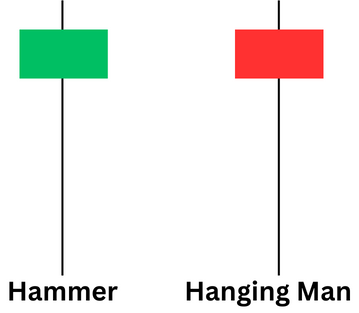

##Now let's see this in a candlestick chart
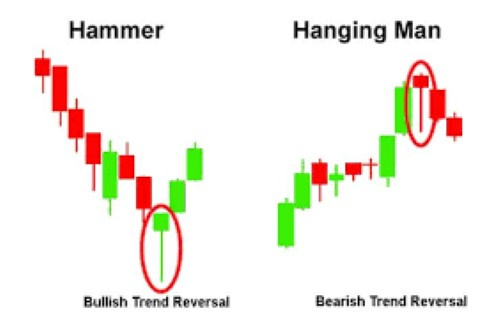


## CODE IMPLEMENTATION

In [ ]:
hammer=talib.CDLHAMMER(data.Open,data.High,data.Low,data.Close)
hammer

In [ ]:
hanging_man=talib.CDLHANGINGMAN(data.Open,data.High,data.Low,data.Close)
hanging_man

In [ ]:
print(hammer[hammer==100])

In [ ]:
print(hanging_man[hanging_man==-100])

In [66]:
buys= (hammer==100)
sells = (hanging_man==-100)

In [ ]:
pf=vbt.Portfolio.from_signals(data.Close,buys,sells)
print(pf.stats())
pf.plot().show()

# **INVERTED HAMMER AND SHOOTING STAR**

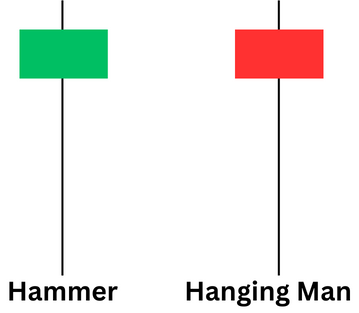

## Let's see this in a candlestick chart

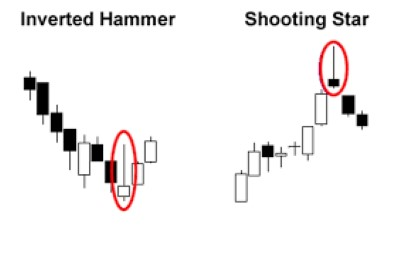

## CODE IMPLEMENTATION

In [ ]:
inverted_hammer=talib.CDLINVERTEDHAMMER(data.Open,data.High,data.Low,data.Close)
inverted_hammer

In [ ]:
shooting_star=talib.CDLSHOOTINGSTAR(data.Open,data.High,data.Low,data.Close)
shooting_star

In [ ]:
print(inverted_hammer[inverted_hammer==100])

In [ ]:
print(shooting_star[shooting_star==-100])

In [ ]:
buys= (inverted_hammer==100)
sells = (shooting_star==-100)

In [ ]:
pf=vbt.Portfolio.from_signals(data.Close,buys,sells)
print(pf.stats())
pf.plot().show()

# **DRAGONFLY DOJI AND GRAVESTONE DOJI**

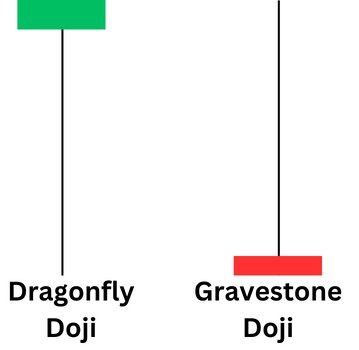

## Let's take a look at a candlestick chart
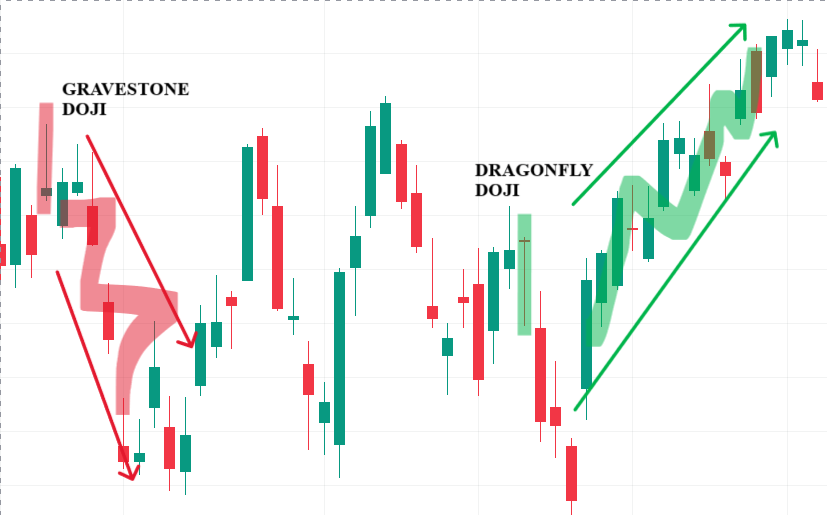

##CODE IMPLEMENTATION

In [ ]:
dragonfly=talib.CDLDRAGONFLYDOJI(data.Open,data.High,data.Low,data.Close)
dragonfly

In [ ]:
gravestone=talib.CDLGRAVESTONEDOJI(data.Open,data.High,data.Low,data.Close)
gravestone

In [ ]:
print(dragonfly[dragonfly==100])

In [ ]:
print(gravestone[gravestone==100])

In [ ]:
buys= (dragonfly==100)
sells = (gravestone==100)

In [ ]:
pf=vbt.Portfolio.from_signals(data.Close,buys,sells)
print(pf.stats())
pf.plot().show()

#BULLISH MARUBOZU AND BEARISH MARUBOZU

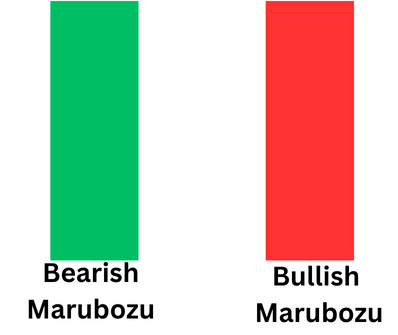

##Let's Look at a candlestick chart

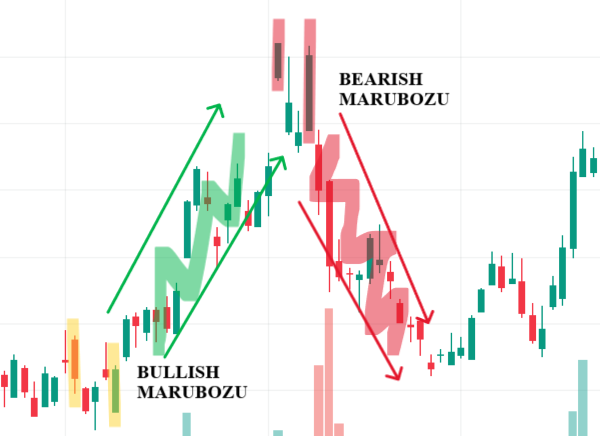

##CODE IMPLEMENTATION

In [ ]:
marubozu=talib.CDLMARUBOZU(data.Open,data.High,data.Low,data.Close)
marubozu

In [ ]:
print(marubozu[marubozu==100])

In [ ]:
print(marubozu[marubozu==-100])

In [ ]:
buys=(marubozu==100)
sells=(marubozu==-100)

pf=vbt.Portfolio.from_signals(data.Close,buys,sells)
print(pf.stats())
pf.plot().show()